In [1]:
import numpy as np
import pandas as pd

In [2]:
from __future__ import print_function
!pip install xlrd
import xlrd
print('xlrd installed!')

xlrd installed!


In [3]:
df= pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                           sheet_name='Canada by Citizenship',
                  skiprows=range(20),
                  skipfooter=2)
print('Dataframe uploaded')
df.head(2)

Dataframe uploaded


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603


In [4]:
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [5]:
df.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'}, inplace=True)

In [6]:
all(isinstance(column,str) for column in df.columns) #checking if all columns are strings

False

In [7]:
df.columns=list(map(str,df.columns)) #converting all columsn to strings
all(isinstance(column,str) for column in df.columns)

True

In [8]:
df.set_index('Country', inplace=True)
df.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603


In [9]:
df['Total']=df.sum(axis=1)
df.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


In [10]:
year=list(map(str,(range(1980,2014))))
year

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [11]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
print('Matplotlib Version=', mpl.__version__)

Matplotlib Version= 3.3.2


In [12]:
df.sort_values(['Total'], ascending=False, axis=0, inplace=True) #sorting the nations in desccending order as per total number of migrants
df1=df.head(5) #variable of top 5 countries of immigrants
df1=df1[year].transpose()
df1.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


In [13]:
#Area Plot

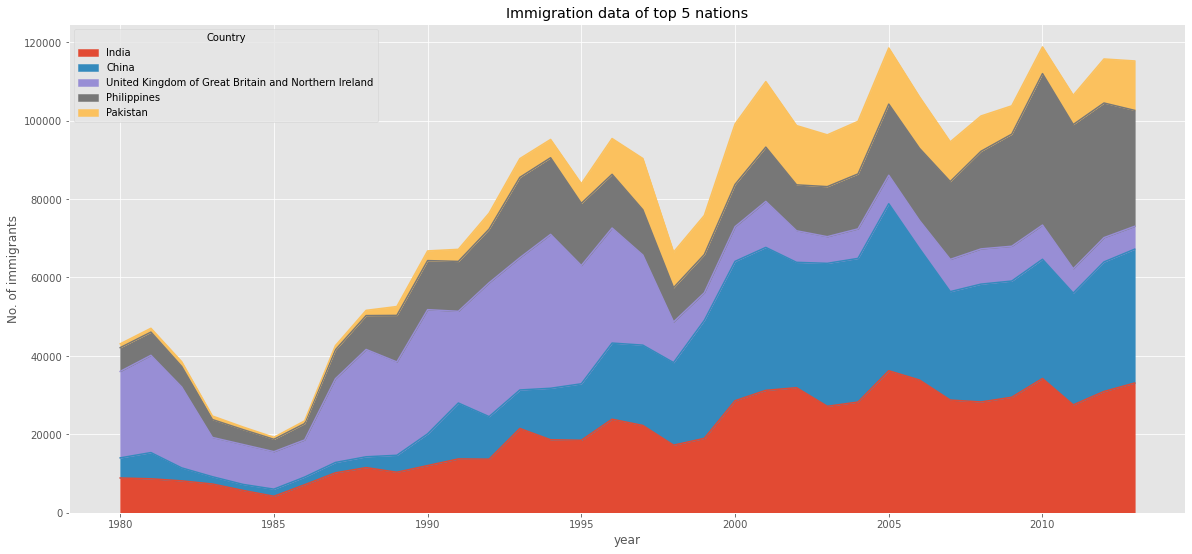

In [14]:
df1.plot(kind='area', figsize=(20,9)) #figsize is used for changing the length and brasth of graph
plt.title('Immigration data of top 5 nations')
plt.ylabel('No. of immigrants')
plt.xlabel('year')
plt.show()

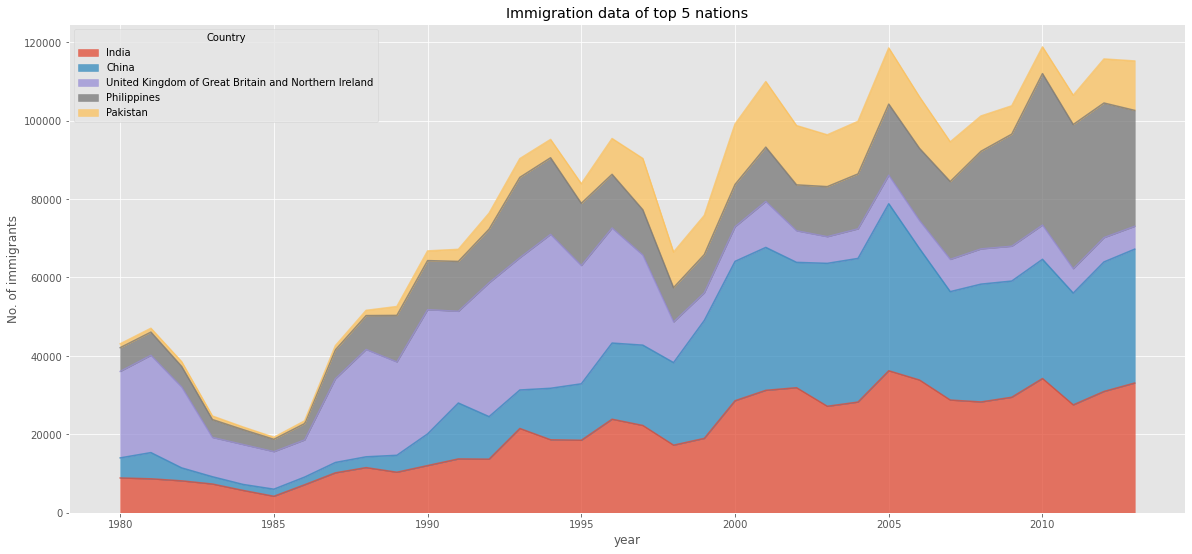

In [15]:
df1.plot(kind='area', alpha=0.75, figsize=(20,9)) # alpha is used for marking brightness
plt.title('Immigration data of top 5 nations')
plt.ylabel('No. of immigrants')
plt.xlabel('year')
plt.show()

In [16]:
#Histogram

In [17]:
df['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [18]:
count, bin_edges=np.histogram(df['2013']) #histogram in tabular format in 2013
print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


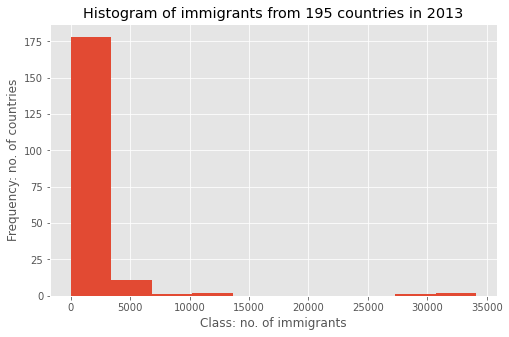

In [19]:
df['2013'].plot(kind='hist',figsize=(8,5)) #histogram in graphical format
plt.title('Histogram of immigrants from 195 countries in 2013')
plt.xlabel('Class: no. of immigrants')
plt.ylabel("Frequency: no. of countries")
plt.show()

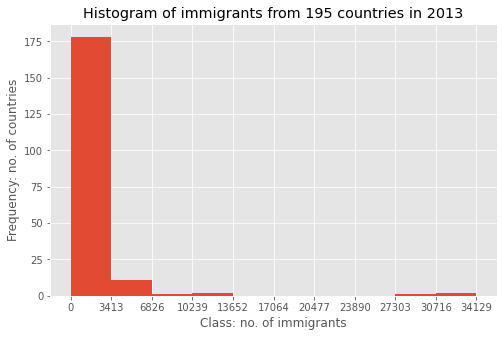

In [20]:
#histogram in graphical format with equidistant class with'xticks'
count, bin_edges=np.histogram(df['2013'])
df['2013'].plot(kind='hist',figsize=(8,5), xticks=bin_edges)
plt.title('Histogram of immigrants from 195 countries in 2013')
plt.xlabel('Class: no. of immigrants')
plt.ylabel("Frequency: no. of countries")
plt.show()

In [21]:
#Plot multiple histograms in 1 frame
df4=df.loc[['Denmark','India','China'],year]
df4

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


<AxesSubplot:ylabel='Frequency'>

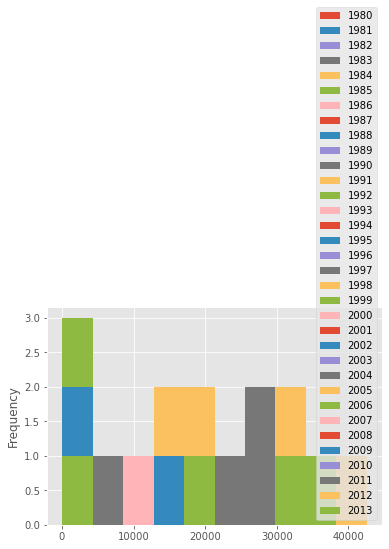

In [22]:
df4.plot.hist()

In [23]:
df5=df4.transpose()
df5

Country,Denmark,India,China
1980,272,8880,5123
1981,293,8670,6682
1982,299,8147,3308
1983,106,7338,1863
1984,93,5704,1527
1985,73,4211,1816
1986,93,7150,1960
1987,109,10189,2643
1988,129,11522,2758
1989,129,10343,4323


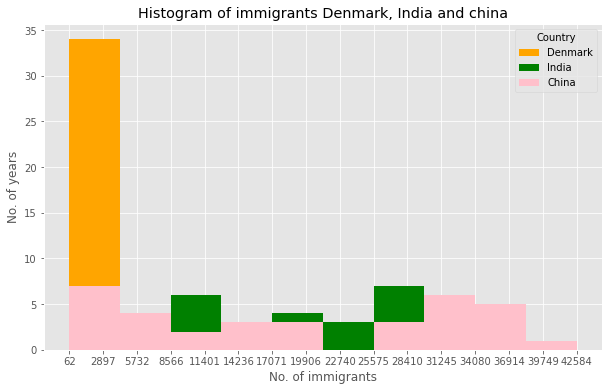

In [24]:
count,bin_edges=np.histogram(df5,15)
df5.plot(kind='hist', figsize=(10,6), xticks=bin_edges, color=['orange','green','pink'])
plt.title('Histogram of immigrants Denmark, India and china')
plt.ylabel('No. of years')
plt.xlabel("No. of immigrants")
plt.show()

In [25]:
df6=df.loc['Iceland',year]
df6

1980    17
1981    33
1982    10
1983     9
1984    13
1985     6
1986    11
1987    11
1988     7
1989     3
1990     2
1991    11
1992    17
1993    15
1994    11
1995     9
1996    14
1997    11
1998    20
1999    17
2000     9
2001    26
2002    11
2003    17
2004    23
2005    10
2006     2
2007    15
2008    13
2009    15
2010    30
2011    38
2012    42
2013    72
Name: Iceland, dtype: object

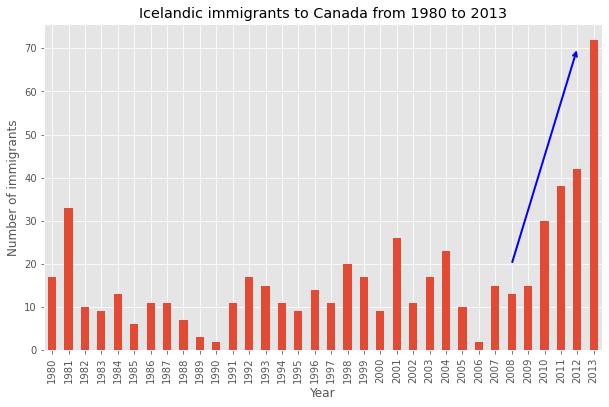

In [26]:
df6.plot(kind='bar',figsize=(10,6))
plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # Place head of the arrow at point (year 2012 , pop 70 )
             xytext=(28, 20),         # Place base of the arrow at point (year 2008 , pop 20 )
             xycoords='data',         # Will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )


plt.show()

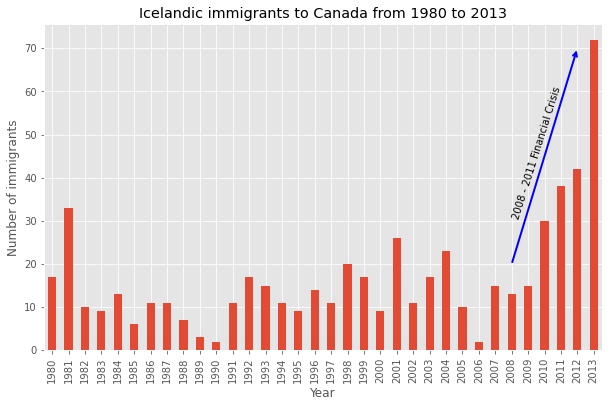

In [27]:
df6.plot(kind='bar',figsize=(10,6))
plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # Place head of the arrow at point (year 2012 , pop 70 )
             xytext=(28, 20),         # Place base of the arrow at point (year 2008 , pop 20 )
             xycoords='data',         # Will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28,30),                   # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                # Based on trial and error to match the arrow
             va='bottom',                  # Want the text to be vertically 'bottom' aligned
             ha='left',                    # Want the text to be horizontally 'left' algned.
            )

plt.show()

In [29]:
#plotting horizontal bars
d7=df.sort_values(by='Total', ascending=True, inplace=True)
d8=df['Total'].tail(15)
d8

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

<AxesSubplot:ylabel='Country'>

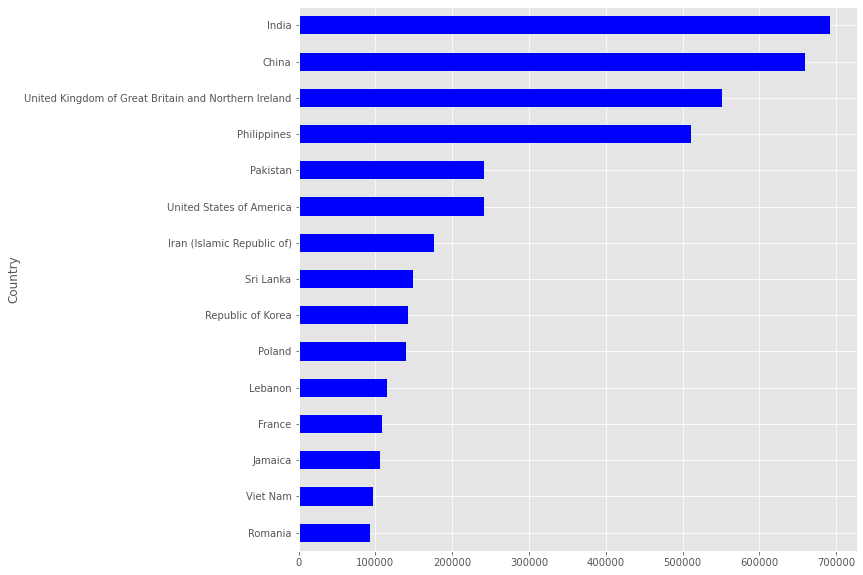

In [33]:
d8.plot(kind='barh', figsize=(10,10), color='blue' )
plt.title('No. of immigrants between ')